# Multi-Task Test
At first we have to install the newest version of fvGP

In [1]:
##First, install the newest version of fvgp
#!pip install fvgp~=4.7.6
#!pip install plotly

## Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from fvgp import GP
import plotly.graph_objects as go
from itertools import product
import plotly.io as pio
pio.renderers.default = "png"
%load_ext autoreload
%autoreload 2

## Simple 1d Example

### Data

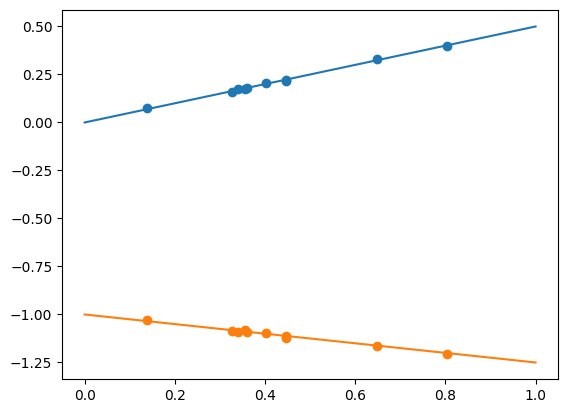

In [3]:
def f1(x): return 0.5 * x
def f2(x): return (-.25 * x) - 1.

x_pred1d = np.linspace(0,1,50)
plt.plot(x_pred1d,f1(x_pred1d))
plt.plot(x_pred1d,f2(x_pred1d))
x_data = np.random.rand(10)
y_data1 = f1(x_data) + np.random.uniform(low = -0.01, high = 0.01, size =len(x_data))
y_data2 = f2(x_data) + np.random.uniform(low = -0.01, high = 0.01, size =len(x_data))
plt.scatter(x_data,y_data1) 
plt.scatter(x_data,y_data2) 
plt.show()

### GP initialization

In [4]:
from fvgp import fvGP

my_gp2 = fvGP(x_data.reshape(len(x_data),1), np.column_stack([y_data1, y_data2]))
print("Global Training in progress")
my_gp2.train(max_iter = 20, info=True)




Global Training in progress


/home/marcus/Coding/fvGP/fvgp/gp.py:278: UserWarning:

Hyperparameters initialized to a vector of ones.

/home/marcus/Coding/fvGP/fvgp/gp.py:312: UserWarning:

No noise function or measurement noise provided. Noise variances will be set to (0.01 * mean(|y_data|))^2.

/home/marcus/Coding/fvGP/fvgp/gp.py:613: UserWarning:

Default hyperparameter_bounds initialized because none were provided. This will fail for custom kernel, mean, or noise functions



array([1.2695014 , 4.75240269, 0.15917539])

In [6]:
print("Data as seen by fvgp:")
print(my_gp2.fvgp_x_data)
print(my_gp2.fvgp_y_data)

print("Transformed data for the GP:")
print(my_gp2.x_data)
print(my_gp2.y_data)

Data as seen by fvgp:
[[0.33921837]
 [0.36098002]
 [0.40157112]
 [0.4475779 ]
 [0.80468543]
 [0.32753599]
 [0.13799153]
 [0.64875631]
 [0.35664221]
 [0.44674571]]
[[ 0.17245586 -1.09016425]
 [ 0.18183349 -1.09146442]
 [ 0.20486823 -1.09499828]
 [ 0.21399927 -1.12092604]
 [ 0.39958427 -1.20731766]
 [ 0.16061524 -1.08470685]
 [ 0.07478714 -1.03095622]
 [ 0.33064648 -1.16447897]
 [ 0.17664644 -1.08028899]
 [ 0.22193625 -1.10993399]]
Transformed data for the GP:
[[0.33921837 0.        ]
 [0.36098002 0.        ]
 [0.40157112 0.        ]
 [0.4475779  0.        ]
 [0.80468543 0.        ]
 [0.32753599 0.        ]
 [0.13799153 0.        ]
 [0.64875631 0.        ]
 [0.35664221 0.        ]
 [0.44674571 0.        ]
 [0.33921837 1.        ]
 [0.36098002 1.        ]
 [0.40157112 1.        ]
 [0.4475779  1.        ]
 [0.80468543 1.        ]
 [0.32753599 1.        ]
 [0.13799153 1.        ]
 [0.64875631 1.        ]
 [0.35664221 1.        ]
 [0.44674571 1.        ]]
[[ 0.17245586]
 [ 0.18183349]
 [ 0.2

### Predictions

In [7]:
y_test = np.hstack([f1(x_pred1d).reshape(len(x_pred1d),1),f2(x_pred1d).reshape(len(x_pred1d),1)])
print("RMSE:              ", my_gp2.rmse(x_pred1d.reshape(len(x_pred1d),1),y_test))
print("NLPD:              ", my_gp2.nlpd(x_pred1d.reshape(len(x_pred1d),1),y_test))
print("R2:                ", my_gp2.r2(x_pred1d.reshape(len(x_pred1d),1),y_test))
print("CRPS (mean, std):  ", my_gp2.crps(x_pred1d.reshape(len(x_pred1d),1),y_test))

RMSE:               0.006448691234691224
NLPD:               -3.8340104137267508
R2:                 0.999914469585141
CRPS (mean, std):   (np.float64(0.003232230782150085), np.float64(0.0028429309278038854))


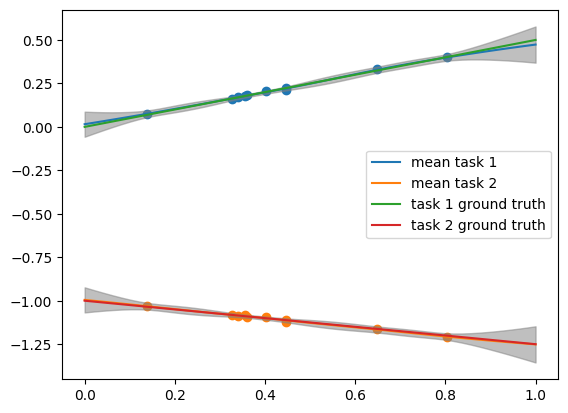

In [8]:
#mean and standard deviation
mean = my_gp2.posterior_mean(x_pred=x_pred1d.reshape(50,1))["m(x)"]
std = np.sqrt(my_gp2.posterior_covariance(x_pred=x_pred1d.reshape(50,1), x_out=np.array([0,1]))["v(x)"])


plt.plot(x_pred1d.reshape(50,1),mean[:,0], label = "mean task 1")
plt.plot(x_pred1d.reshape(50,1),mean[:,1], label = "mean task 2")
plt.scatter(x_data,y_data1) 
plt.scatter(x_data,y_data2) 
plt.plot(x_pred1d,f1(x_pred1d), label = "task 1 ground truth")
plt.plot(x_pred1d,f2(x_pred1d), label = "task 2 ground truth")
plt.fill_between(x_pred1d, mean[:,0] - 3. * std[:,0], mean[:,0] + 3. * std[:,0], alpha = 0.5, color = "grey")
plt.fill_between(x_pred1d, mean[:,1] - 3. * std[:,1], mean[:,1] + 3. * std[:,1], alpha = 0.5, color = "grey")
plt.legend()
plt.show()

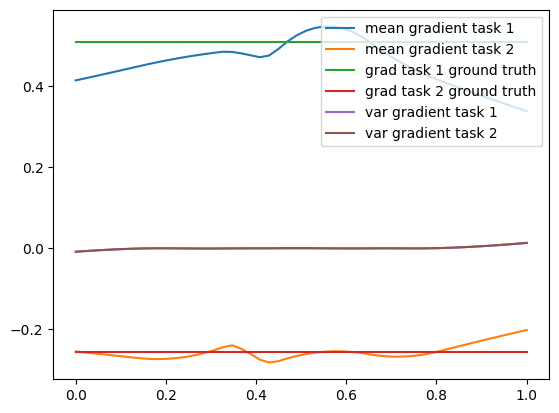

In [9]:
#mean gradient and variance gradient
mean_grad = my_gp2.posterior_mean_grad(x_pred=x_pred1d.reshape(50,1), x_out=np.array([0,1]))["dm/dx"]
var_grad = my_gp2.posterior_covariance_grad(x_pred=x_pred1d.reshape(50,1), x_out=np.array([0,1]))["dv/dx"]

plt.plot(x_pred1d.reshape(50,1),mean_grad[:,0,0], label = "mean gradient task 1")
plt.plot(x_pred1d.reshape(50,1),mean_grad[:,0,1], label = "mean gradient task 2")
plt.plot(x_pred1d,np.gradient(f1(x_pred1d), 1./50.), label = "grad task 1 ground truth")
plt.plot(x_pred1d,np.gradient(f2(x_pred1d), 1./50.), label = "grad task 2 ground truth")
plt.plot(x_pred1d.reshape(50,1),var_grad[:,0,0], label = "var gradient task 1")
plt.plot(x_pred1d.reshape(50,1),var_grad[:,0,1], label = "var gradient task 2")
plt.legend()
plt.show()

### What if some tasks are missing from the data

#### It works just fine, but we have to insert np.nan at positions of missing data, both for y and the variances. 

In [10]:
y_data = np.column_stack([y_data1, y_data2])
noise_variances = np.zeros(y_data.shape) + 0.01
y_data[2,0] = np.nan
noise_variances[2,0] = np.nan

y_data[6,1] = np.nan
noise_variances[6,1] = np.nan

my_gp2 = fvGP(x_data.reshape(len(x_data),1), y_data, noise_variances=noise_variances)
print("Global Training in progress")
my_gp2.train(max_iter = 20)

Global Training in progress


/home/marcus/Coding/fvGP/fvgp/gp.py:278: UserWarning:

Hyperparameters initialized to a vector of ones.

/home/marcus/Coding/fvGP/fvgp/gp.py:613: UserWarning:

Default hyperparameter_bounds initialized because none were provided. This will fail for custom kernel, mean, or noise functions



array([1.50794369, 2.97063764, 0.92085437])

## 3d Example

### Data

In [11]:
data = np.load("./data/sim_variable_mod.npy")
sparsification = 4

x_data3 = data[:,5:][::sparsification]
y_data3 = data[:,0:2][::sparsification]

#it is good practice to check the format of the data
print(x_data3.shape)
print(y_data3.shape)

(1583, 3)
(1583, 2)


In [12]:
index = np.where(x_data3[:,2] == 1200.)[0]
x_data3=x_data3[index,0:2]
y_data3=y_data3[index]

for i in range(x_data3.shape[1]):
    x_data3[:,i] = x_data3[:,i] - np.min(x_data3[:,i])
    x_data3[:,i] = x_data3[:,i] / np.max(x_data3[:,i])

In [13]:
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
x_pred3D = np.asarray(list(product(x, y)))

In [14]:
def scatter(x,y,z,size=3, color = 1):
    #if not color: color = z
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(x=x, y=y, z=z,mode='markers',marker=dict(color=color, size = size)))
    
    
    fig.update_layout(autosize=False,
                  width=800, height=800,
                  font=dict(size=18,),
                  margin=dict(l=0, r=0, b=0, t=0))
    fig.show()

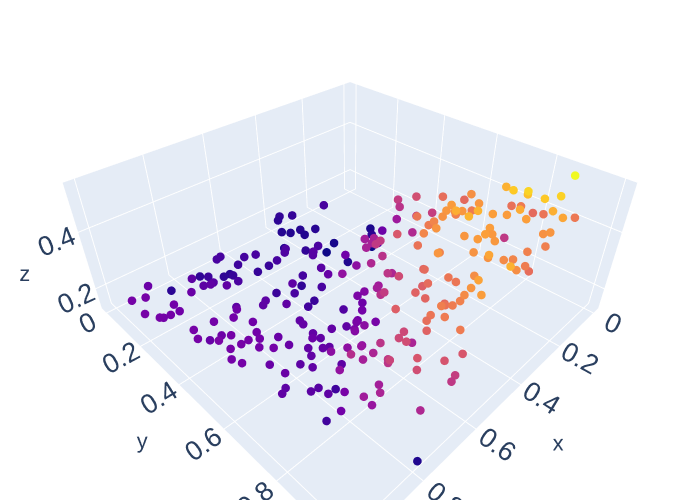

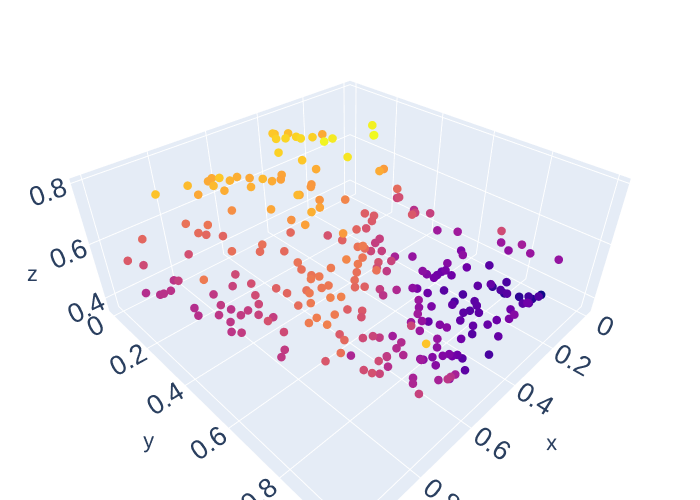

In [15]:
scatter(x_data3[:,0],x_data3[:,1],y_data3[:,0], size = 5, color = y_data3[:,0])
scatter(x_data3[:,0],x_data3[:,1],y_data3[:,1], size = 5, color = y_data3[:,1])

### Initialization

#### (a) Default behavior --- minimal

In [16]:
from fvgp import fvGP

my_gp2 = fvGP(x_data3,y_data3)
print("Global Training in progress")
my_gp2.train(max_iter = 2)

Global Training in progress


/home/marcus/Coding/fvGP/fvgp/gp.py:278: UserWarning:

Hyperparameters initialized to a vector of ones.

/home/marcus/Coding/fvGP/fvgp/gp.py:312: UserWarning:

No noise function or measurement noise provided. Noise variances will be set to (0.01 * mean(|y_data|))^2.

/home/marcus/Coding/fvGP/fvgp/gp.py:613: UserWarning:

Default hyperparameter_bounds initialized because none were provided. This will fail for custom kernel, mean, or noise functions



array([0.295993  , 1.55060101, 7.86147004, 3.38807862])

#### (b) Custom kernel
It is vital in the multi-task case to think hard about kernel design. The kernel is now a function
over X x X x T x T, where X is the input and T is the output space. Print the input of the kernel, it will have the dimensionality of this cartesian product space. 
The default kernel in fvgp is just a Matern kernel operating in this new space.

In [17]:
#A simple kernel that won't lead to good performance because it's stationary
from fvgp.kernels import *
def mkernel(x1,x2,hps):
    d = get_distance_matrix(x1,x2)
    return hps[0] * matern_kernel_diff1(d,hps[1])

In [18]:
my_gp2 = fvGP(x_data3,y_data3,
              init_hyperparameters=np.ones((2)), kernel_function=mkernel
             )
print("MCMC Training in progress")


bounds = np.array([[0.01,1.],[0.01,1.]])
my_gp2.train(hyperparameter_bounds=bounds,max_iter = 20)

MCMC Training in progress


array([0.91980207, 0.73702807])

#### (c) A custom deep kernel

In [19]:
from fvgp.deep_kernel_network import *
iset_dim = 3
gp_deep_kernel_layer_width = 5
n = Network(iset_dim, gp_deep_kernel_layer_width)
print(n.number_of_hps)

def deep_multi_task_kernel(x1, x2, hps):  # pragma: no cover
    signal_var = hps[0]
    length_scale = hps[1]
    hps_nn = hps[2:]
    w1_indices = np.arange(0, gp_deep_kernel_layer_width * iset_dim)
    last = gp_deep_kernel_layer_width * iset_dim
    w2_indices = np.arange(last, last + gp_deep_kernel_layer_width ** 2)
    last = last + gp_deep_kernel_layer_width ** 2
    w3_indices = np.arange(last, last + gp_deep_kernel_layer_width * iset_dim)
    last = last + gp_deep_kernel_layer_width * iset_dim
    b1_indices = np.arange(last, last + gp_deep_kernel_layer_width)
    last = last + gp_deep_kernel_layer_width
    b2_indices = np.arange(last, last + gp_deep_kernel_layer_width)
    last = last + gp_deep_kernel_layer_width
    b3_indices = np.arange(last, last + iset_dim)

    n.set_weights(hps_nn[w1_indices].reshape(gp_deep_kernel_layer_width, iset_dim),
                  hps_nn[w2_indices].reshape(gp_deep_kernel_layer_width, gp_deep_kernel_layer_width),
                  hps_nn[w3_indices].reshape(iset_dim, gp_deep_kernel_layer_width))
    n.set_biases(hps_nn[b1_indices].reshape(gp_deep_kernel_layer_width),
                 hps_nn[b2_indices].reshape(gp_deep_kernel_layer_width),
                 hps_nn[b3_indices].reshape(iset_dim))
    x1_nn = n.forward(x1)
    x2_nn = n.forward(x2)
    d = get_distance_matrix(x1_nn, x2_nn)
    k = signal_var * matern_kernel_diff1(d, length_scale)
    return k


my_gp2 = fvGP(x_data3,y_data3,
              init_hyperparameters=np.ones((n.number_of_hps+2))*0.1, kernel_function=deep_multi_task_kernel
             )
print("Global Training in progress")


bounds = np.zeros((n.number_of_hps+2,2))
bounds[0] = np.array([0.01,1.])
bounds[1] = np.array([0.1,1.])
bounds[2:] = np.array([-1,1])
my_gp2.train(hyperparameter_bounds=bounds,max_iter = 1000, method = "mcmc")

68
Global Training in progress


/home/marcus/Coding/fvGP/fvgp/gp.py:312: UserWarning:

No noise function or measurement noise provided. Noise variances will be set to (0.01 * mean(|y_data|))^2.

/home/marcus/Coding/fvGP/fvgp/gp_mcmc.py:200: RuntimeWarning:

overflow encountered in exp



array([ 0.49638403,  0.34021156, -0.27976502,  0.36332351,  0.65663307,
       -0.28214041,  0.34856145,  0.78189265, -0.10770256, -0.20989997,
        0.29047862,  0.32462407,  0.77931546,  0.58831216,  0.50410555,
        0.60879763,  0.01239629,  0.76064229,  0.77118199,  0.5943829 ,
        0.25142729, -0.27922975, -0.43836993,  0.89798494,  0.04438555,
       -0.64358593,  0.10682171, -0.2299638 , -0.3161067 ,  0.12358958,
        0.12679774,  0.85631568,  0.65329964,  0.05163514,  0.14128094,
        0.83267281,  0.10120301, -0.73294281,  0.8772565 ,  0.15424723,
        0.96738766, -0.25937958,  0.03965654,  0.36417454,  0.94798227,
       -0.14233453, -0.30918666,  0.3369992 ,  0.01812308, -0.18542312,
        0.73633285, -0.1647999 , -0.25790109, -0.37361116,  0.74592153,
       -0.07124359,  0.79215256,  0.14322811, -0.58050392,  0.68523678,
        0.45736916,  0.13296861,  0.1946599 , -0.1742313 ,  0.42179461,
       -0.22034721, -0.03280923,  0.26658725, -0.45746003, -0.34

### Prediction

In [20]:
mean = my_gp2.posterior_mean(x_pred3D)["m(x)"]
var =  my_gp2.posterior_covariance(x_pred3D)["v(x)"]

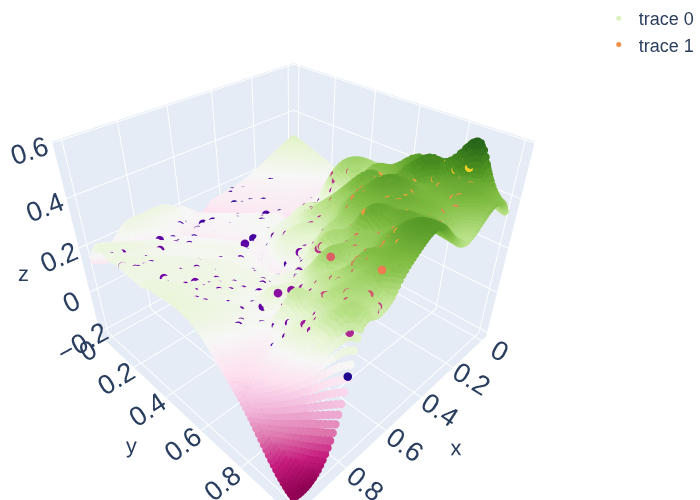

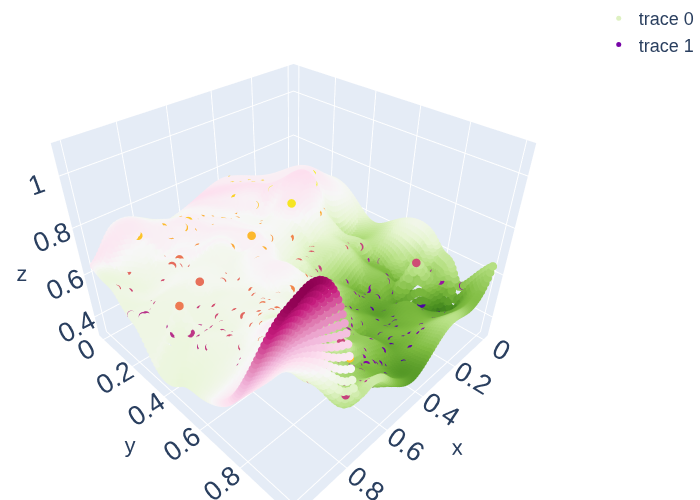

In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=x_pred3D[:,0],y=x_pred3D[:,1], z=mean[:,0],
                             mode='markers',marker=dict(color=mean[:,0], size = 5)))
fig.add_trace(go.Scatter3d(x=x_data3[:,0], y=x_data3[:,1] , z=y_data3[:,0],
                           mode='markers',marker=dict(color=y_data3[:,0], size = 5)))
fig.update_layout(autosize=False,
                  width=800, height=800,
                  font=dict(size=18,),
                  margin=dict(l=0, r=0, b=0, t=0))
fig.show()



fig = go.Figure()
fig.add_trace(go.Scatter3d(x=x_pred3D[:,0],y=x_pred3D[:,1], z=mean[:,1],
                             mode='markers',marker=dict(color=mean[:,0], size = 5)))
fig.add_trace(go.Scatter3d(x=x_data3[:,0], y=x_data3[:,1] , z=y_data3[:,1],
                           mode='markers',marker=dict(color=y_data3[:,1], size = 5)))
fig.update_layout(autosize=False,
                  width=800, height=800,
                  font=dict(size=18,),
                  margin=dict(l=0, r=0, b=0, t=0))
fig.show()
